In [25]:
                             #importing the all the requireed  libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [3]:
#loading the data 
data=pd.read_csv("C:\\Users\\hemav\\Downloads\\countries-aggregated.csv\\countries-aggregated.csv")

In [4]:
data   #checking the data is loaded or not

,Date,Country,Confirmed,Recovered,Deaths
0,24-03-2020,Afghanistan,43,1,1
1,25-03-2020,Afghanistan,76,2,2
2,26-03-2020,Afghanistan,80,2,3
3,27-03-2020,Afghanistan,91,2,3
4,28-03-2020,Afghanistan,107,2,4
...,...,...,...,...,...
91266,07-05-2021,Zimbabwe,38403,36041,1576
91267,08-05-2021,Zimbabwe,38414,36052,1576
91268,09-05-2021,Zimbabwe,38419,36063,1576
91269,10-05-2021,Zimbabwe,38433,36208,1576


In [6]:
data.isnull().sum()    #checking null values and noisy data

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [7]:
data['Country'].unique()       #checking the unique values in the columns

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [8]:
data['Country']=data['Country'].map({'Afghanistan':0, 'Albania':1, 'Algeria':2, 'Andorra':3, 'Angola':4,
       'Antigua and Barbuda':5, 'Argentina':6, 'Armenia':7, 'Australia':8,
       'Austria':9, 'Azerbaijan':10, 'Bahamas':11, 'Bahrain':12, 'Bangladesh':13,
       'Barbados':14, 'Belarus':15, 'Belgium':16, 'Belize':17, 'Benin':18, 'Bhutan':19,
       'Bolivia':20, 'Bosnia and Herzegovina':21, 'Botswana':22, 'Brazil':23,
       'Brunei':24, 'Bulgaria':25, 'Burkina Faso':26, 'Burma':27, 'Burundi':28,
       'Cabo Verde':29, 'Cambodia':30, 'Cameroon':31, 'Canada':32,
       'Central African Republic':33, 'Chad':34, 'Chile':35, 'China':36, 'Colombia':37,
       'Comoros':38, 'Congo (Brazzaville)':39, 'Congo (Kinshasa)':40, 'Costa Rica':41,
       "Cote d'Ivoire":42, 'Croatia':43, 'Cuba':44, 'Cyprus':45, 'Czechia':46, 'Denmark':47,
       'Diamond Princess':48, 'Djibouti':49, 'Dominica':50, 'Dominican Republic':51,
       'Ecuador':52, 'Egypt':53, 'El Salvador':54, 'Equatorial Guinea':55, 'Eritrea':56,
       'Estonia':57, 'Eswatini':58, 'Ethiopia':59, 'Fiji':60, 'Finland':61, 'France':62,
       'Gabon':63, 'Gambia':64, 'Georgia':65, 'Germany':66, 'Ghana':67, 'Greece':68,
       'Grenada':69, 'Guatemala':70, 'Guinea':71, 'Guinea-Bissau':72, 'Guyana':73,
       'Haiti':74, 'Holy See':75, 'Honduras':76, 'Hungary':77, 'Iceland':78, 'India':79,
       'Indonesia':80, 'Iran':81, 'Iraq':82, 'Ireland':83, 'Israel':84, 'Italy':85,
       'Jamaica':86, 'Japan':87, 'Jordan':88, 'Kazakhstan':89, 'Kenya':90,
       'Korea, South':91, 'Kosovo':92, 'Kuwait':93, 'Kyrgyzstan':94, 'Laos':95, 'Latvia':96,
       'Lebanon':97, 'Lesotho':98, 'Liberia':99, 'Libya':100, 'Liechtenstein':101,
       'Lithuania':102, 'Luxembourg':103, 'MS Zaandam':104, 'Madagascar':105, 'Malawi':106,
       'Malaysia':107, 'Maldives':108, 'Mali':109, 'Malta':110, 'Marshall Islands':111,
       'Mauritania':112, 'Mauritius':113, 'Mexico':114, 'Micronesia':115, 'Moldova':116,
       'Monaco':117, 'Mongolia':118, 'Montenegro':119, 'Morocco':120, 'Mozambique':121,
       'Namibia':122, 'Nepal':123, 'Netherlands':124, 'New Zealand':125, 'Nicaragua':126,
       'Niger':127, 'Nigeria':128, 'North Macedonia':129, 'Norway':130, 'Oman':131,
       'Pakistan':132, 'Panama':133, 'Papua New Guinea':134, 'Paraguay':135, 'Peru':136,
       'Philippines':137, 'Poland':138, 'Portugal':139, 'Qatar':140, 'Romania':141, 'Russia':142,
       'Rwanda':143, 'Saint Kitts and Nevis':144, 'Saint Lucia':145,
       'Saint Vincent and the Grenadines':146, 'Samoa':147, 'San Marino':148,
       'Sao Tome and Principe':149, 'Saudi Arabia':150, 'Senegal':151, 'Serbia':152,
       'Seychelles':153, 'Sierra Leone':154, 'Singapore':155, 'Slovakia':156, 'Slovenia':157,
       'Solomon Islands':158,          'Somalia':159, 'South Africa':160, 'South Sudan':161,
       'Spain':162, 'Sri Lanka':162, 'Sudan':163, 'Suriname':164, 'Sweden':165, 'Switzerland':166,
       'Syria':167, 'Taiwan*':168, 'Tajikistan':169, 'Tanzania':170, 'Thailand':171,
       'Timor-Leste':172, 'Togo':173, 'Trinidad and Tobago':174, 'Tunisia':175, 'Turkey':176,
       'US':177, 'Uganda':178, 'Ukraine':179, 'United Arab Emirates':180,
       'United Kingdom':181, 'Uruguay':182, 'Uzbekistan':183, 'Vanuatu':184, 'Venezuela':185,
       'Vietnam':186, 'West Bank and Gaza':187, 'Yemen':188, 'Zambia':189, 'Zimbabwe':190})

In [9]:
data  # checking whether the string values are changed to flaot values

,Date,Country,Confirmed,Recovered,Deaths
0,24-03-2020,0,43,1,1
1,25-03-2020,0,76,2,2
2,26-03-2020,0,80,2,3
3,27-03-2020,0,91,2,3
4,28-03-2020,0,107,2,4
...,...,...,...,...,...
91266,07-05-2021,190,38403,36041,1576
91267,08-05-2021,190,38414,36052,1576
91268,09-05-2021,190,38419,36063,1576
91269,10-05-2021,190,38433,36208,1576


In [11]:
data['Date'].unique() 

array(['24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020',
       '05-04-2020', '06-04-2020', '07-04-2020', '08-04-2020',
       '09-04-2020', '10-04-2020', '11-04-2020', '12-04-2020',
       '13-04-2020', '14-04-2020', '15-04-2020', '16-04-2020',
       '17-04-2020', '18-04-2020', '19-04-2020', '20-04-2020',
       '21-04-2020', '22-04-2020', '23-04-2020', '24-04-2020',
       '25-04-2020', '26-04-2020', '27-04-2020', '28-04-2020',
       '29-04-2020', '30-04-2020', '01-05-2020', '02-05-2020',
       '03-05-2020', '04-05-2020', '05-05-2020', '06-05-2020',
       '07-05-2020', '08-05-2020', '09-05-2020', '10-05-2020',
       '11-05-2020', '12-05-2020', '13-05-2020', '14-05-2020',
       '15-05-2020', '16-05-2020', '17-05-2020', '18-05-2020',
       '19-05-2020', '20-05-2020', '21-05-2020', '22-05-2020',
       '23-05-2020', '24-05-2020', '25-05-2020', '26-05

In [12]:
data['Date']=data['Date'].map({'24-03-2020':0, '25-03-2020':1, '26-03-2020':2, '27-03-2020':3,
       '28-03-2020':4, '29-03-2020':5, '30-03-2020':6, '31-03-2020':7,
       '01-04-2020':8, '02-04-2020':9, '03-04-2020':10, '04-04-2020':11,
       '05-04-2020':12, '06-04-2020':13, '07-04-2020':14, '08-04-2020':15,
       '09-04-2020':16, '10-04-2020':17, '11-04-2020':18, '12-04-2020':19,
       '13-04-2020':20, '14-04-2020':21, '15-04-2020':22, '16-04-2020':23,
       '17-04-2020':24, '18-04-2020':25, '19-04-2020':26, '20-04-2020':27,
       '21-04-2020':28, '22-04-2020':29, '23-04-2020':30, '24-04-2020':31,
       '25-04-2020':32, '26-04-2020':33, '27-04-2020':34, '28-04-2020':35,
       '29-04-2020':36, '30-04-2020':37, '01-05-2020':38, '02-05-2020':39,
       '03-05-2020':40, '04-05-2020':41, '05-05-2020':42, '06-05-2020':43,
       '07-05-2020':44, '08-05-2020':45, '09-05-2020':46, '10-05-2020':47,
       '11-05-2020':48, '12-05-2020':49, '13-05-2020':50, '14-05-2020':51,
       '15-05-2020':52, '16-05-2020':53, '17-05-2020':54, '18-05-2020':55,
       '19-05-2020':56, '20-05-2020':57, '21-05-2020':58, '22-05-2020':59,
       '23-05-2020':60, '24-05-2020':61, '25-05-2020':62, '26-05-2020':63,
       '27-05-2020':64, '28-05-2020':65, '29-05-2020':66, '30-05-2020':67,
       '31-05-2020':68, '01-06-2020':69, '02-06-2020':70, '03-06-2020':71,
       '04-06-2020':72, '05-06-2020':73, '06-06-2020':74, '07-06-2020':75,
       '08-06-2020':76, '09-06-2020':77, '10-06-2020':78, '11-06-2020':79,
       '12-06-2020':80, '13-06-2020':81, '14-06-2020':82, '15-06-2020':83,
       '16-06-2020':84, '17-06-2020':85, '18-06-2020':86, '19-06-2020':87,
       '20-06-2020':88, '21-06-2020':89, '22-06-2020':90, '23-06-2020':91,
       '24-06-2020':92, '25-06-2020':93, '26-06-2020':94, '27-06-2020':95,
       '28-06-2020':96, '29-06-2020':97, '30-06-2020':98, '01-07-2020':99,
       '02-07-2020':100, '03-07-2020':101, '04-07-2020':102, '05-07-2020':103,
       '06-07-2020':104, '07-07-2020':105, '08-07-2020':106, '09-07-2020':107,
       '10-07-2020':108, '11-07-2020':109, '12-07-2020':110, '13-07-2020':111,
       '14-07-2020':112, '15-07-2020':113, '16-07-2020':114, '17-07-2020':115,
       '18-07-2020':116, '19-07-2020':117, '20-07-2020':118, '21-07-2020':119,
       '22-07-2020':120, '23-07-2020':121, '24-07-2020':122, '25-07-2020':123,
       '26-07-2020':124, '27-07-2020':125, '28-07-2020':126, '29-07-2020':127,
       '30-07-2020':128, '31-07-2020':129, '01-08-2020':130, '02-08-2020':131,
       '03-08-2020':132, '04-08-2020':133, '05-08-2020':134, '06-08-2020':135,
       '07-08-2020':136, '08-08-2020':137, '09-08-2020':138, '10-08-2020':139,
       '11-08-2020':140, '12-08-2020':141, '13-08-2020':142, '14-08-2020':143,
       '15-08-2020':144, '16-08-2020':145, '17-08-2020':146, '18-08-2020':147,
       '19-08-2020':148, '20-08-2020':149, '21-08-2020':150, '22-08-2020':151,
       '23-08-2020':152, '24-08-2020':153, '25-08-2020':154, '26-08-2020':155,
       '27-08-2020':156, '28-08-2020':157, '29-08-2020':158, '30-08-2020':159,
       '31-08-2020':160, '01-09-2020':161, '02-09-2020':162, '03-09-2020':163,
       '04-09-2020':164, '05-09-2020':165, '06-09-2020':166, '07-09-2020':167,
       '08-09-2020':168, '09-09-2020':169, '10-09-2020':170, '11-09-2020':171,
       '12-09-2020':172, '13-09-2020':173, '14-09-2020':174, '15-09-2020':175,
       '16-09-2020':176, '17-09-2020':177, '18-09-2020':178, '19-09-2020':179,
       '20-09-2020':180, '21-09-2020':181, '22-09-2020':182, '23-09-2020':183,
       '24-09-2020':184, '25-09-2020':185, '26-09-2020':186, '27-09-2020':187,
       '28-09-2020':188, '29-09-2020':189, '30-09-2020':190, '01-10-2020':191,
       '02-10-2020':190, '03-10-2020':191,'04-10-2020':192, '05-10-2020':193,
       '06-10-2020':194, '07-10-2020':195, '08-10-2020':196, '09-10-2020':197,
       '10-10-2020':198, '11-10-2020':199, '12-10-2020':200, '13-10-2020':201,
       '14-10-2020':202, '15-10-2020':203, '16-10-2020':204, '17-10-2020':205,
       '18-10-2020':206, '19-10-2020':207, '20-10-2020':208, '21-10-2020':209,
       '22-10-2020':210, '23-10-2020':211, '24-10-2020':212, '25-10-2020':213,
       '26-10-2020':214, '27-10-2020':215, '28-10-2020':216, '29-10-2020':217,
       '30-10-2020':218, '31-10-2020':219, '01-11-2020':220, '02-11-2020':221,
       '03-11-2020':222, '04-11-2020':223, '05-11-2020':224, '06-11-2020':225,
       '07-11-2020':226, '08-11-2020':227, '09-11-2020':228, '10-11-2020':229,
       '11-11-2020':230, '12-11-2020':231, '13-11-2020':232, '14-11-2020':233,
       '15-11-2020':234, '16-11-2020':235, '17-11-2020':236, '18-11-2020':237,
       '19-11-2020':238, '20-11-2020':239, '21-11-2020':240, '22-11-2020':241,
       '23-11-2020':242, '24-11-2020':243, '25-11-2020':244, '26-11-2020':245,
       '27-11-2020':246, '28-11-2020':247, '29-11-2020':248, '30-11-2020':249,
       '01-12-2020':250, '02-12-2020':251, '03-12-2020':252, '04-12-2020':253,
       '05-12-2020':254, '06-12-2020':255, '07-12-2020':256, '08-12-2020':257,
       '09-12-2020':258, '10-12-2020':260, '11-12-2020':260, '12-12-2020':261,
       '13-12-2020':262, '14-12-2020':263, '15-12-2020':264, '16-12-2020':265,
       '17-12-2020':266, '18-12-2020':267, '19-12-2020':268, '20-12-2020':269,
       '21-12-2020':270, '22-12-2020':271, '23-12-2020':272, '24-12-2020':273,
       '25-12-2020':274, '26-12-2020':275, '27-12-2020':276, '28-12-2020':277,
       '29-12-2020':278, '30-12-2020':279, '31-12-2020':280, '01-01-2021':281,
       '02-01-2021':282, '03-01-2021':283, '04-01-2021':284, '05-01-2021':285,
       '06-01-2021':286, '07-01-2021':287, '08-01-2021':288, '09-01-2021':289,
       '10-01-2021':290, '11-01-2021':291, '12-01-2021':292, '13-01-2021':293,
       '14-01-2021':294, '15-01-2021':295, '16-01-2021':296, '17-01-2021':297,
       '18-01-2021':298, '19-01-2021':299, '20-01-2021':300, '21-01-2021':301,
       '22-01-2021':302, '23-01-2021':303, '24-01-2021':304, '25-01-2021':305,
       '26-01-2021':306, '27-01-2021':307, '28-01-2021':308, '29-01-2021':309,
       '30-01-2021':310, '31-01-2021':311, '01-02-2021':312, '02-02-2021':313,
       '03-02-2021':314, '04-02-2021':315, '05-02-2021':316, '06-02-2021':317,
       '07-02-2021':318, '08-02-2021':319, '09-02-2021':320, '10-02-2021':321,
       '11-02-2021':322, '12-02-2021':323, '13-02-2021':324, '14-02-2021':325,
       '15-02-2021':326, '16-02-2021':327, '17-02-2021':328, '18-02-2021':329,
       '19-02-2021':330, '20-02-2021':331, '21-02-2021':332, '22-02-2021':333,
       '23-02-2021':334, '24-02-2021':335, '25-02-2021':336, '26-02-2021':337,
       '27-02-2021':338, '28-02-2021':339, '01-03-2021':340, '02-03-2021':341,
       '03-03-2021':342, '04-03-2021':343, '05-03-2021':344, '06-03-2021':345,
       '07-03-2021':346, '08-03-2021':347, '09-03-2021':348, '10-03-2021':349,
       '11-03-2021':350, '12-03-2021':351, '13-03-2021':352, '14-03-2021':353,
       '15-03-2021':354, '16-03-2021':355, '17-03-2021':356, '18-03-2021':357,
       '19-03-2021':358, '20-03-2021':359, '21-03-2021':360, '22-03-2021':361,
       '23-03-2021':362, '24-03-2021':363, '25-03-2021':364, '26-03-2021':365,
       '27-03-2021':366, '28-03-2021':367, '29-03-2021':368, '30-03-2021':369,
       '31-03-2021':370, '01-04-2021':371, '02-04-2021':372, '03-04-2021':373,
       '04-04-2021':374, '05-04-2021':375, '06-04-2021':376, '07-04-2021':377,
       '08-04-2021':378, '09-04-2021':379, '10-04-2021':380, '11-04-2021':381,
       '12-04-2021':382, '13-04-2021':383, '14-04-2021':384, '15-04-2021':385,
       '16-04-2021':386, '17-04-2021':387, '18-04-2021':389, '19-04-2021':390,
       '20-04-2021':391, '21-04-2021':392, '22-04-2021':393, '23-04-2021':394,
       '24-04-2021':395, '25-04-2021':396, '26-04-2021':397, '27-04-2021':398,
       '28-04-2021':399, '29-04-2021':400, '30-04-2021':401, '01-05-2021':402,
       '02-05-2021':403, '03-05-2021':404, '04-05-2021':405, '05-05-2021':406,
       '06-05-2021':407, '07-05-2021':408, '08-05-2021':409, '09-05-2021':410,
       '10-05-2021':411, '11-05-2021':412, '21-03-2020':413, '22-03-2020':414,
       '23-03-2020':415, '22-01-2020':416, '23-01-2020':417, '24-01-2020':418,
       '25-01-2020':419, '26-01-2020':420, '27-01-2020':421, '28-01-2020':422,
       '29-01-2020':423, '30-01-2020':424, '31-01-2020':425, '01-02-2020':426,
       '02-02-2020':427, '03-02-2020':428, '04-02-2020':429, '05-02-2020':430,
       '06-02-2020':431, '07-02-2020':432, '08-02-2020':433, '09-02-2020':434,
       '10-02-2020':435, '11-02-2020':436, '12-02-2020':437, '13-02-2020':438,
       '14-02-2020':439, '15-02-2020':440, '16-02-2020':441, '17-02-2020':442,
       '18-02-2020':443, '19-02-2020':444, '20-02-2020':445, '21-02-2020':446,
       '22-02-2020':447, '23-02-2020':448, '24-02-2020':449, '25-02-2020':450,
       '26-02-2020':451, '27-02-2020':452, '28-02-2020':453, '29-02-2020':454,
       '01-03-2020':455, '02-03-2020':456, '03-03-2020':457, '04-03-2020':458,
       '05-03-2020':459, '06-03-2020':460, '07-03-2020':461, '08-03-2020':462,
       '09-03-2020':463, '10-03-2020':464, '11-03-2020':465, '12-03-2020':466,
       '13-03-2020':467, '14-03-2020':468, '15-03-2020':469, '16-03-2020':470,
       '17-03-2020':471, '18-03-2020':472, '19-03-2020':473, '20-03-2020':474})

In [13]:
data

,Date,Country,Confirmed,Recovered,Deaths
0,0,0,43,1,1
1,1,0,76,2,2
2,2,0,80,2,3
3,3,0,91,2,3
4,4,0,107,2,4
...,...,...,...,...,...
91266,408,190,38403,36041,1576
91267,409,190,38414,36052,1576
91268,410,190,38419,36063,1576
91269,411,190,38433,36208,1576


In [14]:
X=data.drop('Confirmed',axis=1)         #droping of target value

In [15]:
X                                       #checking the feature values

,Date,Country,Recovered,Deaths
0,0,0,1,1
1,1,0,2,2
2,2,0,2,3
3,3,0,2,3
4,4,0,2,4
...,...,...,...,...
91266,408,190,36041,1576
91267,409,190,36052,1576
91268,410,190,36063,1576
91269,411,190,36208,1576


In [16]:
y=data['Confirmed']            #loading the target values

In [17]:
y      #checking the target values

0           43
1           76
2           80
3           91
4          107
         ...  
91266    38403
91267    38414
91268    38419
91269    38433
91270    38448
Name: Confirmed, Length: 91271, dtype: int64

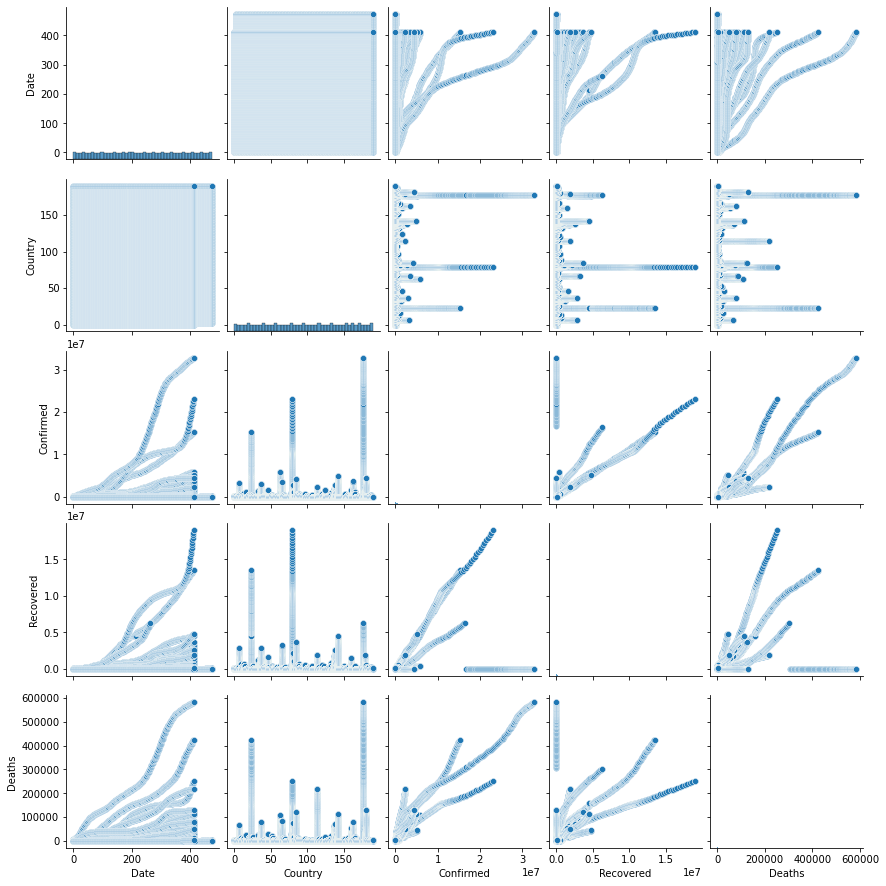

In [18]:
 #Using pairplot method
sns.pairplot(data)

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True) #traing the model

In [20]:
model=DecisionTreeRegressor()  #loading the machine learning algorithm to model

In [21]:
model.fit(X_train,y_train)   #fiting the model

DecisionTreeRegressor()

In [22]:
prediction=model.predict(X_test)    

In [23]:
from sklearn.metrics import r2_score       

In [24]:
r2_score(y_test,prediction)            

0.9871592109493964